In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

In [24]:
df = pd.read_csv("../../data/after_fe_data.csv")

In [25]:
df.head()

goals  assists  shots_total  shots_on_target        xg        xa       gca  \
0   0.25     0.00     0.230769              0.0  0.333333  0.045455  0.000000   
1   0.00     0.00     0.000000              0.0  0.000000  0.045455  0.000000   
2   0.00     0.25     0.076923              0.0  0.037037  0.181818  0.166667   
3   0.00     0.00     0.076923              0.0  0.037037  0.000000  0.000000   
4   0.00     0.25     0.076923              0.0  0.000000  0.136364  0.166667   

    carries  dispossessed  dribbled_past  ...    passes  \
0  0.392118      0.076923       0.250000  ...  0.401858   
1  0.342719      0.076923       0.166667  ...  0.413765   
2  0.368214      0.076923       0.250000  ...  0.300158   
3  0.201802      0.000000       0.000000  ...  0.179640   
4  0.443007      0.153846       0.583333  ...  0.357498   

   passes_progressive_distance  passes_into_final_third  passes_offsides  \
0                     0.360083                 0.108108              0.2   
1                     0.470025                 0.027027              0.0   
2                     0.263087                 0.027027              0.2   
3                     0.293238                 0.054054              0.2   
4                     0.409880                 0.027027              0.4   

   passes_switches  dribbles    fouled     fouls  offsides   minutes  
0         0.200000  0.000000  0.272727  0.222222  0.166667  1.000000  
1         0.000000  0.052632  0.090909  0.222222  0.000000  1.000000  
2         0.066667  0.105263  0.000000  0.222222  0.000000  0.922222  
3         0.066667  0.052632  0.000000  0.000000  0.000000  0.188889  
4         0.000000  0.157895  0.090909  0.222222  0.000000  1.000000  

[5 rows x 35 columns]

## PCA

In [26]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(2)
pca_3D = PCA(3)

pca.fit(df)
pca_3D.fit(df)

PCA(n_components=3)

In [28]:
pca.components_

array([[-0.0126446 , -0.01592643, -0.04262467, -0.01956159, -0.0160734 ,
        -0.0263856 , -0.02322659, -0.29151407, -0.0346948 , -0.06116279,
        -0.00287013, -0.00222443, -0.00153331, -0.00258221, -0.04958123,
        -0.00933761, -0.02447972, -0.07170702, -0.08252675, -0.11658893,
        -0.19706856, -0.34090478, -0.10512755, -0.03895736, -0.08602392,
        -0.30858395, -0.31824384, -0.07963218, -0.02448832, -0.093446  ,
        -0.04811949, -0.07085596, -0.08869087, -0.00201434, -0.68909446],
       [ 0.1516136 ,  0.06018922,  0.26364936,  0.18147543,  0.19077947,
         0.08256186,  0.09780087,  0.00604476,  0.210028  ,  0.11910769,
        -0.00481933,  0.02506478,  0.02386433,  0.03027109,  0.20769894,
         0.02038803,  0.04243925, -0.05049657,  0.00932551,  0.12179757,
         0.5340905 , -0.09002112,  0.0681012 , -0.03452403, -0.12082719,
        -0.14833256, -0.43720081, -0.03066307,  0.00501697, -0.05851411,
         0.22011847,  0.2148494 ,  0.24314452,  0.

In [37]:
# Procent wyjaśnionej wariancji
print(pca.explained_variance_ratio_)

print(pca_3D.explained_variance_ratio_)

[0.44626277 0.09456874]
[0.44626277 0.09456874 0.05993243]


In [43]:
# cumulated percentage of explained variance
print(np.cumsum(pca.explained_variance_ratio_))

print(np.cumsum(pca_3D.explained_variance_ratio_))

[0.44626277 0.54083151]
[0.44626277 0.54083151 0.60076395]


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [35] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot
[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


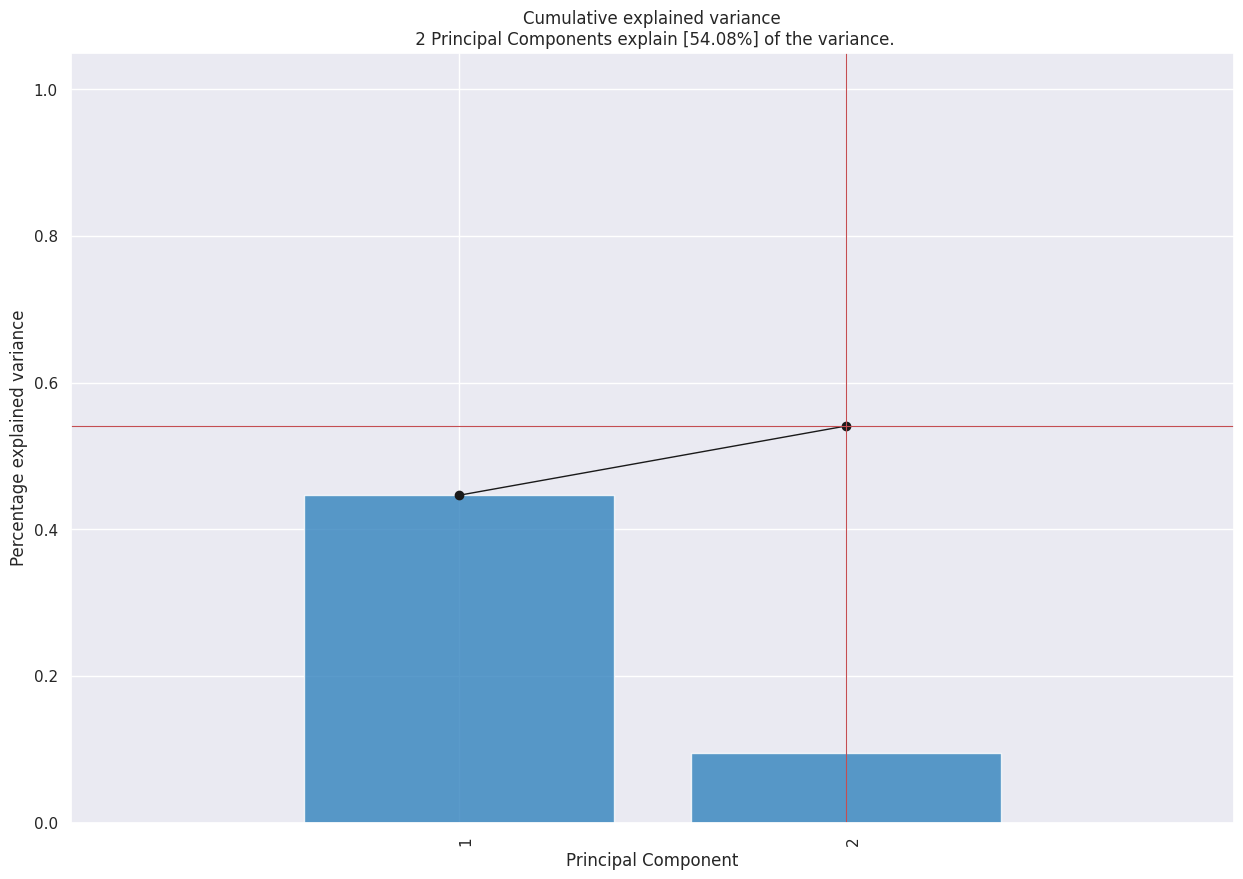

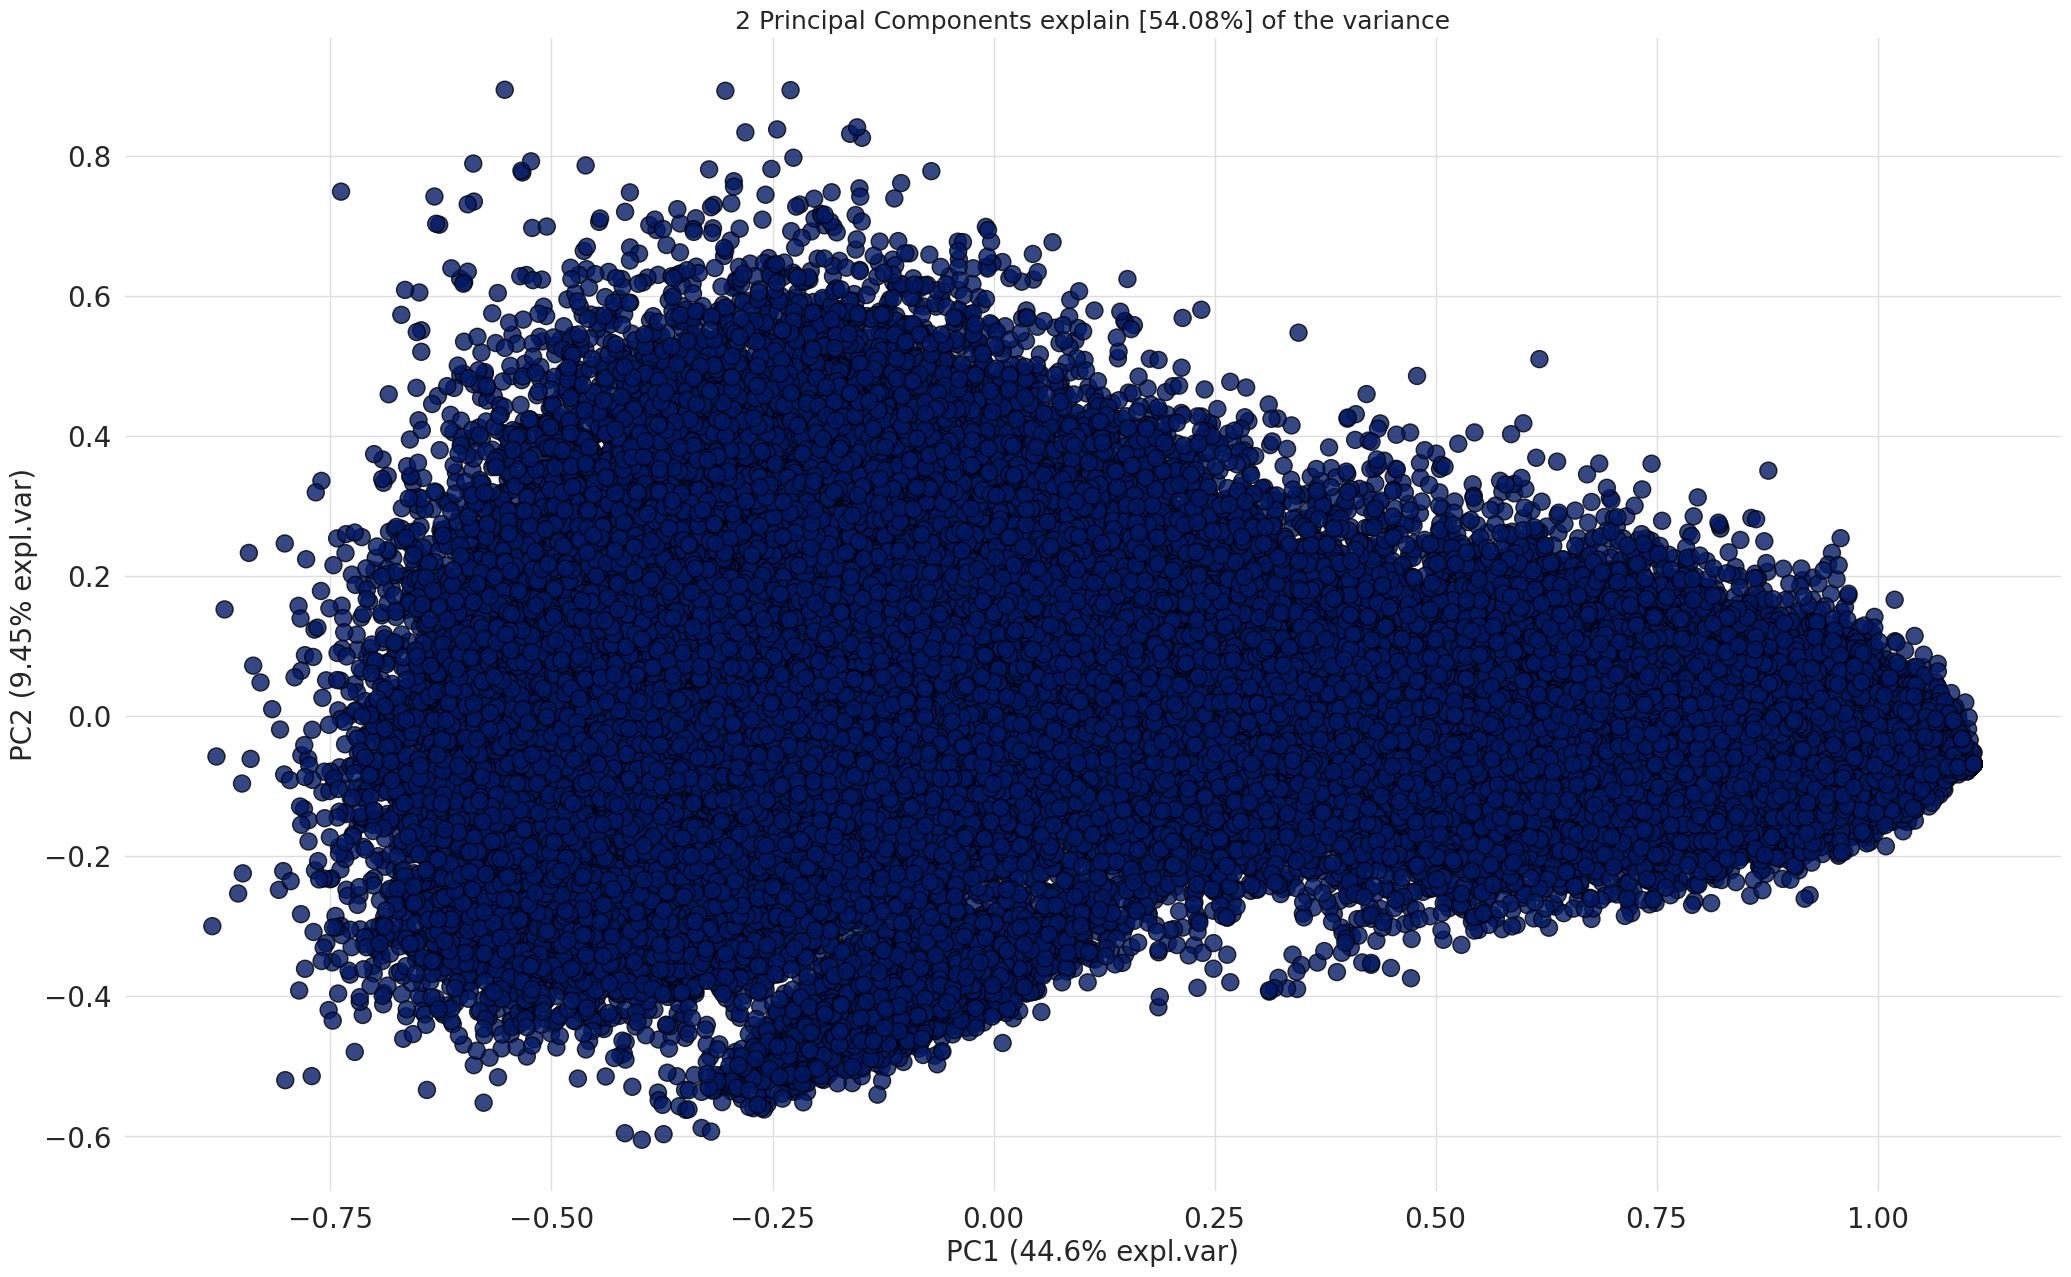

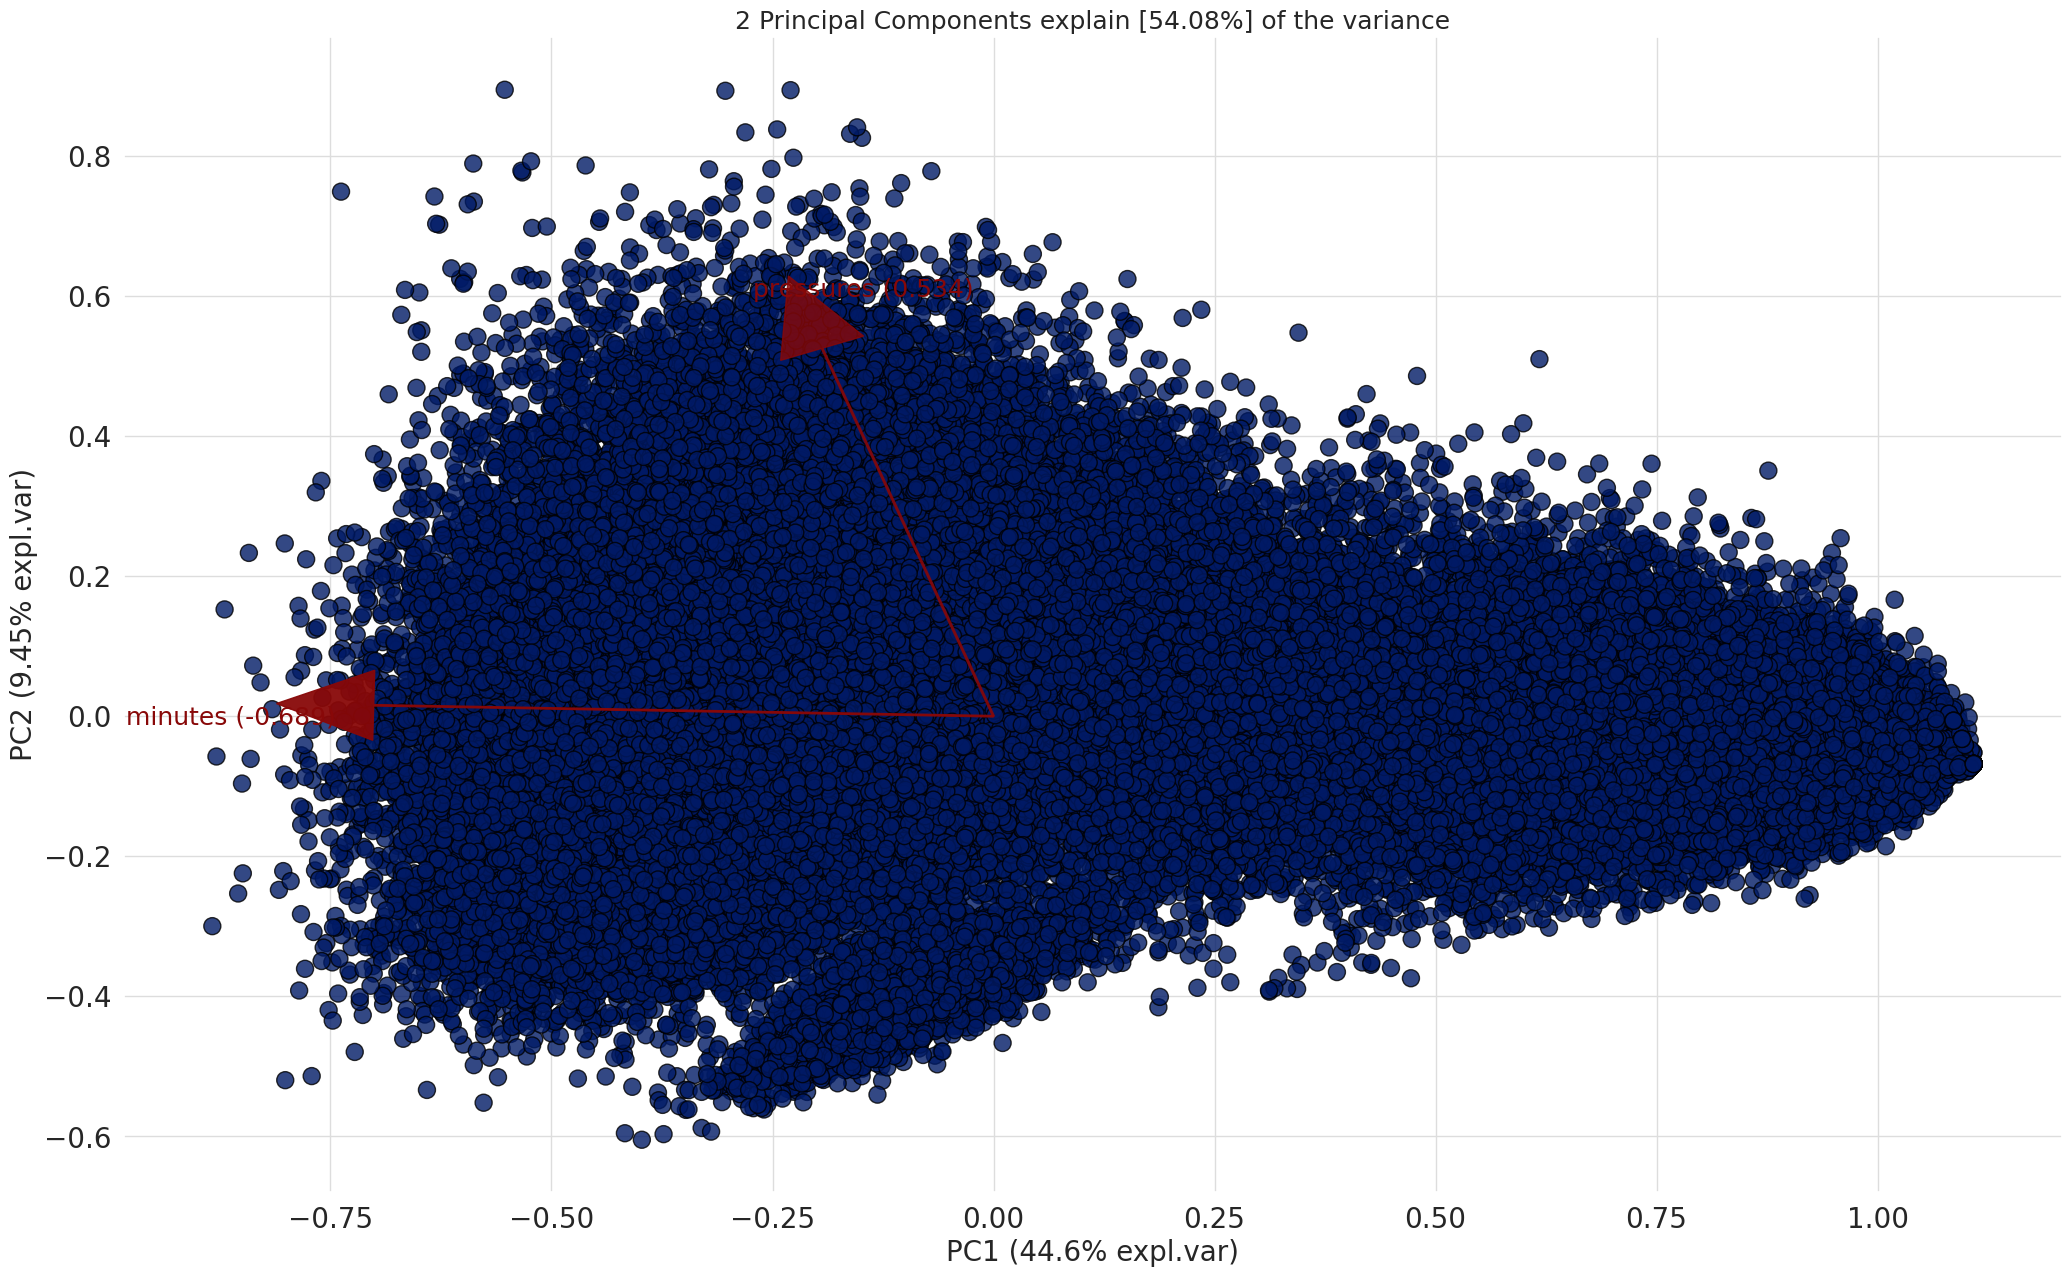

In [46]:
# visualizing pca for 2 dimentions using pca package
from pca import pca
pca_2 = pca(n_components=2)
results = pca_2.fit_transform(df)
fig, ax = pca_2.plot()

fig, ax = pca_2.scatter()

fig, ax = pca_2.biplot(n_feat=2)

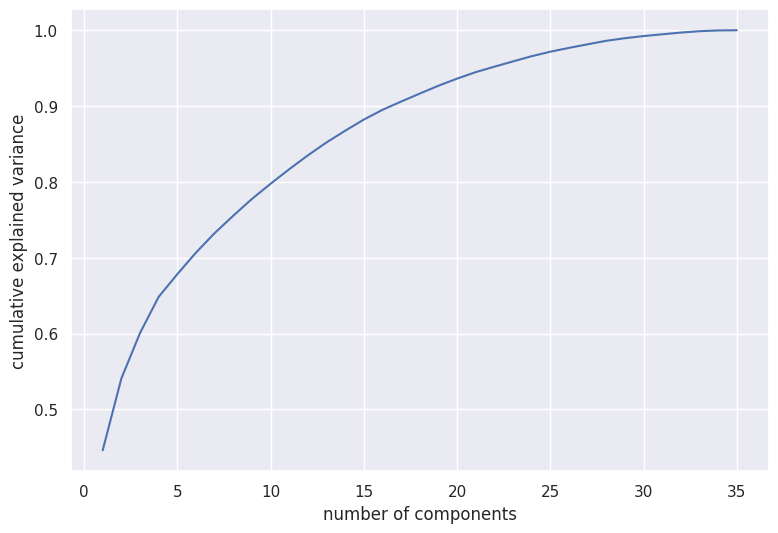

In [47]:
from sklearn.decomposition import PCA
pca = PCA().fit(df)

plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');